In [1]:
# Load data from a CSV file
df <- read.csv("/content/importances.csv")

In [2]:
# Display the first 6 rows of the data frame df
head(df)

,MDI_0,MDI_1,MDI_2,MDI_3,MDI_4,relevance,shrink_mode,lambda,replication
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<int>
1,0.4151255,0.04246040,0.10801064,0.1755160,0.2588875,0,hs,50,0
2,0.2735420,0.07999818,0.15680741,0.2226589,0.2669936,0,hs_entropy,25,0
3,0.2697810,0.09264104,0.16630360,0.2107342,0.2605402,0,hs_log_cardinality,25,0
4,0.2084924,0.09430469,0.25170402,0.2089292,0.2365697,0,hs_permutation,100,0
5,0.1728526,0.09732993,0.27190019,0.2088722,0.2490451,0,hs_global_permutation,100,0
6,0.3753833,0.12454029,0.09943486,0.1657844,0.2348571,5,hs,100,0


In [3]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
generate_boxplots <- function(df) {
    # Load the necessary libraries
    library(ggplot2)
    library(reshape2)

    # Define a custom color palette with attractive colors
    custom_palette <- c("#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#9b59b6")

    # Melt the DataFrame to convert it into a long format
    melted_df <- melt(df, id.vars=c('relevance', 'shrink_mode'),
                      measure.vars=c('MDI_0', 'MDI_1', 'MDI_2', 'MDI_3', 'MDI_4'),
                      variable.name='MDI', value.name='value')

    # Get the unique 'shrink_mode' values for the entire DataFrame
    unique_shrink_modes <- unique(melted_df$shrink_mode)

    # Define custom x-axis labels with LaTeX mathematical expressions
    x_labels <- c(expression(X[1]), expression(X[2]), expression(X[3]), expression(X[4]), expression(X[5]))

    # Define the height of the FacetGrid plots (moderately larger)
    plot_height <- 6

    # Iterate through unique 'relevance' values and create attractive diagrams
    for (relevance_value in unique(melted_df$relevance)) {
        # Filter the data for the current 'relevance' value
        subset_df <- subset(melted_df, relevance == relevance_value)

        # Create a ggplot object for boxplots
        p <- ggplot(subset_df, aes(x=MDI, y=value, fill=shrink_mode)) +
            geom_boxplot() +
            scale_fill_manual(values=custom_palette) +
            labs(x='MDI', y='Value') +
            theme_minimal() +
            theme(legend.position='right') +
            guides(fill=guide_legend(title='')) +
            scale_x_discrete(labels=x_labels) +
            ggtitle(paste('Relevance:', relevance_value)) +
            theme(plot.title = element_text(hjust = 0.5)) # Center the title

        # Print the plot to view it
        print(p)

        # Pause to view the plot before proceeding
        cat("Press Enter to continue...")
        invisible(readLines(""))

        # Save the plot to a file with a relevant filename
        ggsave(filename=paste('Relevance_', relevance_value, '_boxplot.png', sep=''), plot=p, width=12, height=plot_height)
    }
}

Press Enter to continue...

Warning message in file(con, "r"):
“file("") only supports open = "w+" and open = "w+b": using the former”


Press Enter to continue...

Warning message in file(con, "r"):
“file("") only supports open = "w+" and open = "w+b": using the former”


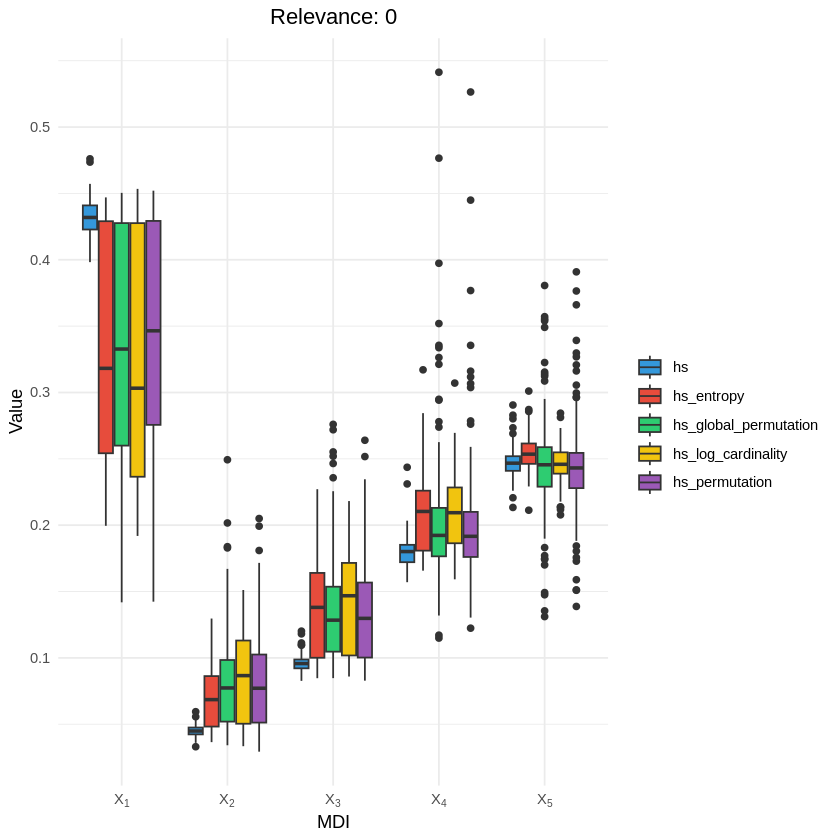

Press Enter to continue...

Warning message in file(con, "r"):
“file("") only supports open = "w+" and open = "w+b": using the former”


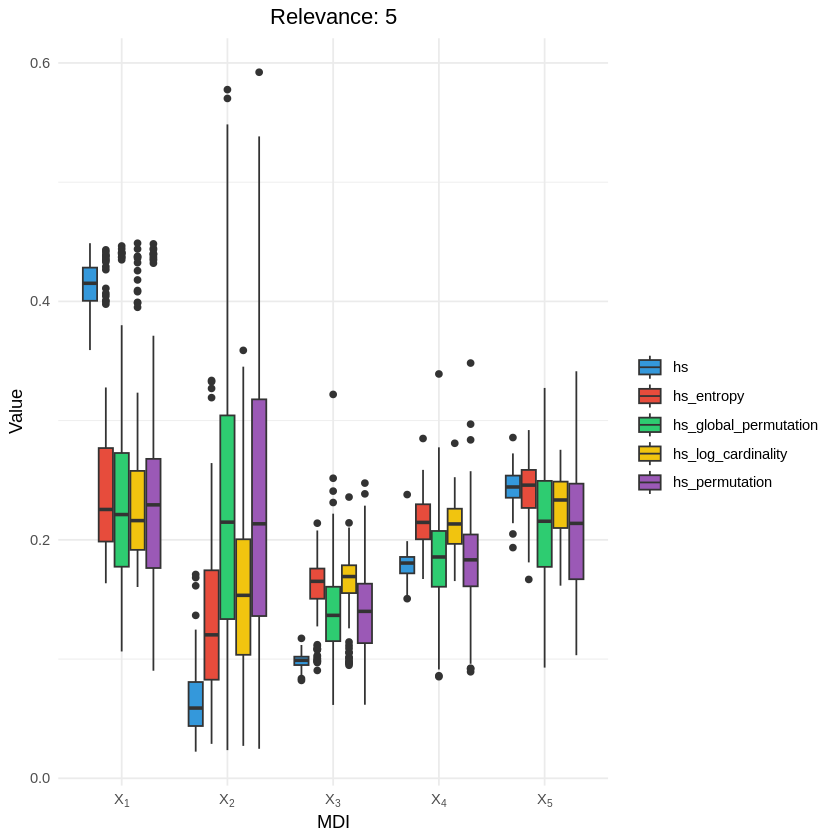

Press Enter to continue...

Warning message in file(con, "r"):
“file("") only supports open = "w+" and open = "w+b": using the former”


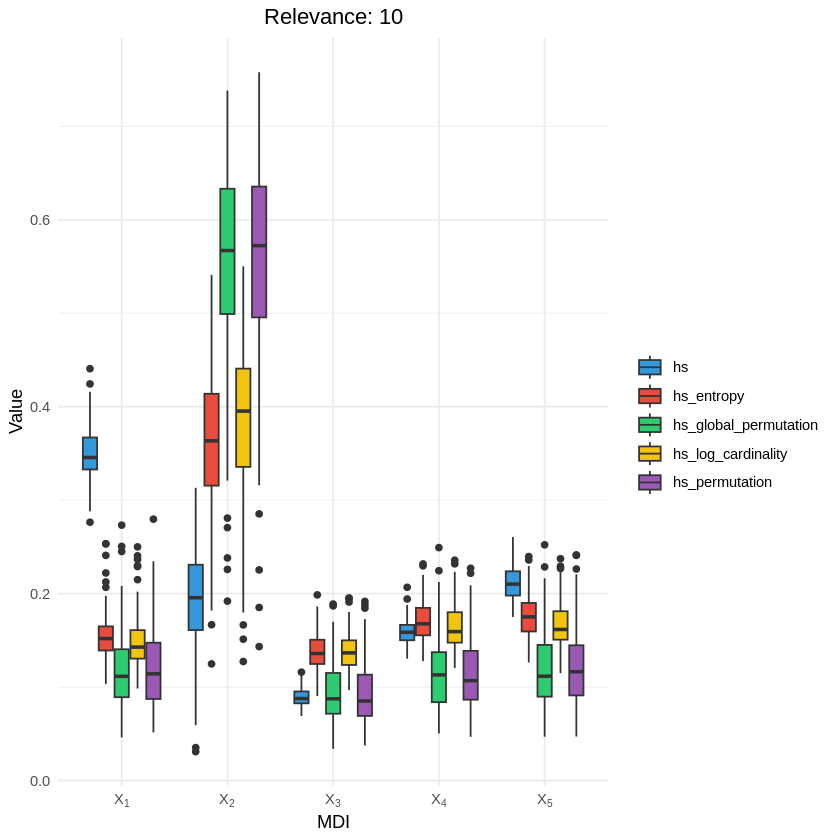

Press Enter to continue...

Warning message in file(con, "r"):
“file("") only supports open = "w+" and open = "w+b": using the former”


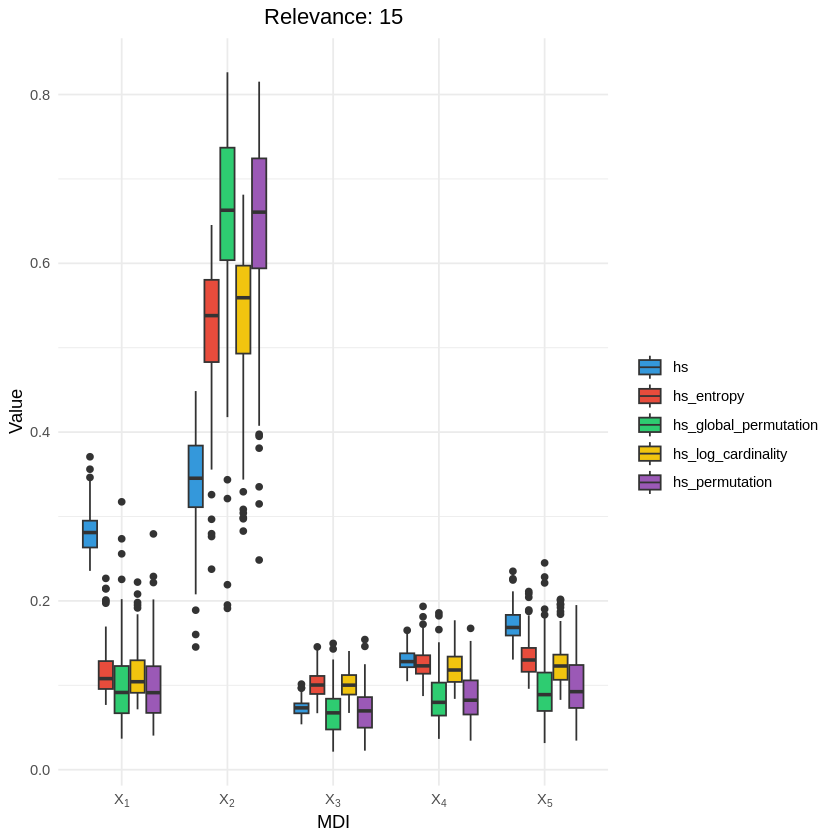

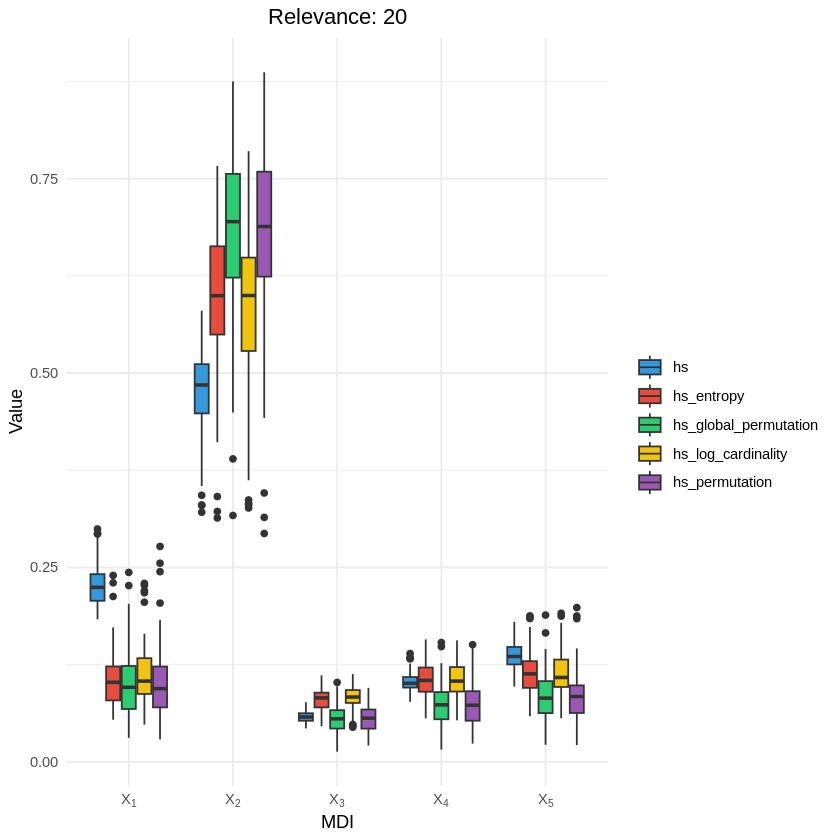

In [5]:
# Example usage with your DataFrame 'your_df'
generate_boxplots(df)